# **Homework 13: Multi-Agent Reinforcement Learning**

#### **Course:** Deep Reinforcement Learning
### Amir Kooshan Fattah Hesari - 401102191

---
## Problem 1: Nash Equilibrium (Theory)

A Nash Equilibrium (NE) represents a state where no player can improve their outcome by unilaterally changing their strategy. For our games, we'll focus on finding the mixed-strategy NE, where players choose their actions probabilistically.

### 1.1 Standard Rock-Scissors-Paper

Given the standard RSP payoff matrix:

| Player 1 | Rock | Scissors | Paper |
| :--- | :--: | :---: | :---: |
| **Rock** | 0, 0 | 1, -1 | -1, 1 |
| **Scissors**| -1, 1 | 0, 0 | 1, -1 |
| **Paper** | 1, -1 | -1, 1 | 0, 0 |


**Your Task:** Analytically derive the mixed-strategy Nash Equilibrium for this game. Show the steps for setting up the indifference equations for Player 1 and solving for Player 2's equilibrium strategy probabilities $(q_R, q_S, q_P)$. (find the Mixed Nash equilibrium of the game)

### **Solution**

Let Player 2 mix with probabilities \($q_R, q_S, q_P$\) over (Rock, Scissors, Paper), with the constraint
$
q_R + q_S + q_P = 1.
$

Player 1’s expected payoff for each **pure** action against \($q_R, q_S, q_P$\):

- If P1 plays **Rock**:
  $
  u_1(R) = 0\cdot q_R + 1\cdot q_S - 1\cdot q_P = q_S - q_P.
  $
- If P1 plays **Scissors**:
  $
  u_1(S) = -1\cdot q_R + 0\cdot q_S + 1\cdot q_P = -q_R + q_P.
  $
- If P1 plays **Paper**:
  $
  u_1(P) = 1\cdot q_R - 1\cdot q_S + 0\cdot q_P = q_R - q_S.
  $

In a mixed-strategy NE where Player 1 randomizes over all three actions, Player 1 must be **indifferent** among Rock, Scissors, and Paper:
$
u_1(R) = u_1(S) = u_1(P).
$

Equate payoffs:
1. \($q_S - q_P = -q_R + q_P \;\Rightarrow\; q_S + q_R = 2q_P$\)
2. \($q_S - q_P = q_R - q_S \;\Rightarrow\; 2q_S = q_R + q_P$\)

Together with \($q_R + q_S + q_P = 1$\), solve:
- From (2): \($q_R = 2q_S - q_P$\).
- Substitute into (1): \($q_S + (2q_S - q_P) = 2q_P \Rightarrow 3q_S = 3q_P \Rightarrow q_S = q_P$\).
- Then \($q_R = q_S$\).

Using the sum constraint:
$
q_R = q_S = q_P = \tfrac{1}{3}.
$

**Mixed-Strategy NE (for both players):**
$
\boxed{(q_R, q_S, q_P) = \left(\tfrac{1}{3}, \tfrac{1}{3}, \tfrac{1}{3}\right)}
$
Each pure action yields expected payoff \(0\) to Player 1, so the value of the game is \(0\).


### 1.2 Modified Rock-Scissors-Paper

Now, consider the modified RSP game where the stakes are higher:

| Player 1 | Rock | Scissors | Paper |
| :--- | :--: | :---: | :---: |
| **Rock** | 0, 0 | 1, -1 | -2, 2 |
| **Scissors**| -1, 1 | 0, 0 | 3, -3 |
| **Paper** | 2, -2 | -3, 3 | 0, 0 |


**Your Task:** Like pervious one Derive the mixed-strategy Nash Equilibrium for this modified game.



### Solution
Let $(q_R, q_S, q_P)$ be Player 2’s probabilities for Rock, Scissors, Paper (sum to 1).

Player 1’s expected payoff from each pure action against $q$:

$$
u_1(R) = 0\cdot q_R + 1\cdot q_S - 2\cdot q_P \;=\; q_S - 2q_P,\\
u_1(S) = -1\cdot q_R + 0\cdot q_S + 3\cdot q_P \;=\; -q_R + 3q_P,\\
u_1(P) = 2\cdot q_R - 3\cdot q_S + 0\cdot q_P \;=\; 2q_R - 3q_S.
$$

In a mixed NE, Player 1 is indifferent among the pure strategies she mixes over, so set them equal:

$$
u_1(R)=u_1(S)=u_1(P).
$$

Using two equalities plus $q_R + q_S + q_P = 1$:

$$
q_S - 2q_P = -q_R + 3q_P
\Rightarrow q_R + q_S = 5q_P \quad \quad \quad (A)\\
-\,q_R + 3q_P = 2q_R - 3q_S
\Rightarrow q_R = q_P + q_S \quad \quad \quad (B)\\
q_R + q_S + q_P = 1. \quad \quad \quad (C)
$$

From (B): $q_R = q_P + q_S$.  
Plug into (A): $(q_P + q_S) + q_S = 5q_P \Rightarrow q_P + 2q_S = 5q_P \Rightarrow q_S = 2q_P.$

Then $q_R = q_P + q_S = 3q_P$.  
Use (C): $3q_P + 2q_P + q_P = 6q_P = 1 \Rightarrow q_P = \tfrac{1}{6}$.

Hence
$$
q_R=\tfrac{1}{2}, \quad q_S=\tfrac{1}{3}, \quad q_P=\tfrac{1}{6}.
$$

Check indifference (and game value):
$$
u_1(R) = \tfrac{1}{3} - 2\cdot\tfrac{1}{6} = 0,\\
u_1(S) = -\tfrac{1}{2} + 3\cdot\tfrac{1}{6} = 0,\\
u_1(P) = 2\cdot\tfrac{1}{2} - 3\cdot\tfrac{1}{3} = 0.
$$
So the value is $v=0$.

By the same indifference reasoning for Player 2 (or solving the dual system), Player 1’s equilibrium mix is the same:
$$
p_R=\tfrac{1}{2},\quad p_S=\tfrac{1}{3},\quad p_P=\tfrac{1}{6}.
$$


---
## Problem 2: Learning by Observation - Fictitious Play (Implementation)

Fictitious Play is an intuitive learning algorithm where each agent models its opponent as playing a stationary strategy defined by the historical frequency of their past actions. The agent then plays a **best response** to this belief.

### 2.1 Implementation

**Your Task:** Implement the `simulate_fictitious_play` function below. It should take the payoff matrices for both players and the number of iterations as input. At each step, each player should choose the action that maximizes their expected payoff given the history of the opponent's plays.

**Algorithm:** At each time step $t > 0$, Player $i$ forms a belief that their opponent ($-i$) will play each action $a'$ with a probability equal to its historical frequency. The agent then chooses an action $a_i^*$ that is a best response to this belief.

Let $C_{t-1}(a_{-i})$ be the count of times opponent $-i$ has played action $a_{-i}$ up to step $t-1$. Player $i$'s best response is:
$$a_{i,t}^* = \arg\max_{a_i \in A_i} \sum_{a_{-i} \in A_{-i}} u_i(a_i, a_{-i}) \cdot \frac{C_{t-1}(a_{-i})}{t-1}$$

**Note on Tie-Breaking:** If multiple actions yield the same maximal expected payoff, your agent should choose one of these best responses uniformly at random.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np

def simulate_fictitious_play(A, B, iterations):

    rng = np.random.default_rng()
    n1, n2 = A.shape
    assert B.shape == (n1, n2), "A and B must have the same shape"

    counts1 = np.zeros(n1, dtype=np.int64)
    counts2 = np.zeros(n2, dtype=np.int64)

    record_every = max(1, iterations // 5000)
    p1_hist, p2_hist = [], []

    counts1[0] += 1
    counts2[0] += 1
    p1_hist.append(counts1 / 1.0)
    p2_hist.append(counts2 / 1.0)

    for t in range(1, iterations):
        freq2 = counts2 / t
        freq1 = counts1 / t

        exp1 = A @ freq2
        exp2 = freq1 @ B

        max1 = exp1.max()
        best1 = np.flatnonzero(np.isclose(exp1, max1, rtol=1e-12, atol=1e-12))
        a1 = int(rng.choice(best1))

        max2 = exp2.max()
        best2 = np.flatnonzero(np.isclose(exp2, max2, rtol=1e-12, atol=1e-12))
        a2 = int(rng.choice(best2))

        counts1[a1] += 1
        counts2[a2] += 1

        if ((t + 1) % record_every == 0) or (t + 1 == iterations):
            p1_hist.append(counts1 / (t + 1))
            p2_hist.append(counts2 / (t + 1))

    return np.array(p1_hist), np.array(p2_hist)

A_std = np.array([[0, 1, -1], [-1, 0, 1], [1, -1, 0]])
A_mod = np.array([[0, 1, -2], [-1, 0, 3], [2, -3, 0]])


B_std = -A_std
B_mod = -A_mod



### 2.2 Analysis

**Your Task:**
1.  Run your simulation for **1,000,000 iterations** on both the **standard** and **modified** RSP games.
2.  Generate two plots, one for each game. Each plot should show the evolution of Players action frequencies over time and include horizontal lines indicating the theoretical NE probabilities you calculated in Problem 1.
3.  **Analyze your results:** Do the action frequencies converge? If so, do they converge to the Nash Equilibrium? Explain the observed behavior.

In [3]:
A_std = np.array([[0, 1, -1], [-1, 0, 1], [1, -1, 0]])
B_std = -A_std
p1_std_freq, p2_std_freq = simulate_fictitious_play(A_std, B_std, 1000000)

A_mod = np.array([[0, 1, -2], [-1, 0, 3], [2, -3, 0]])
B_mod = -A_moda
p1_mod_freq, p2_mod_freq = simulate_fictitious_play(A_mod, B_mod, 1000000)

NameError: name 'A_moda' is not defined

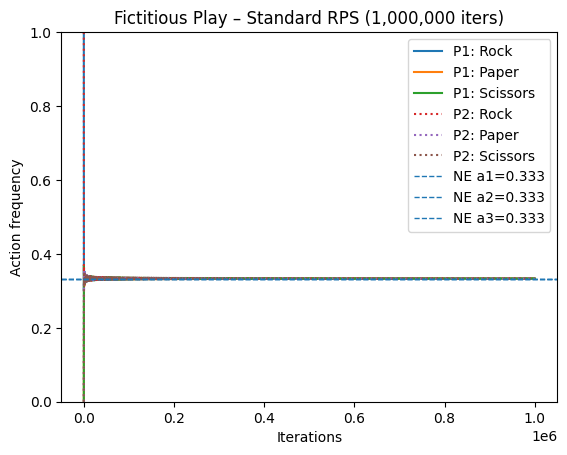

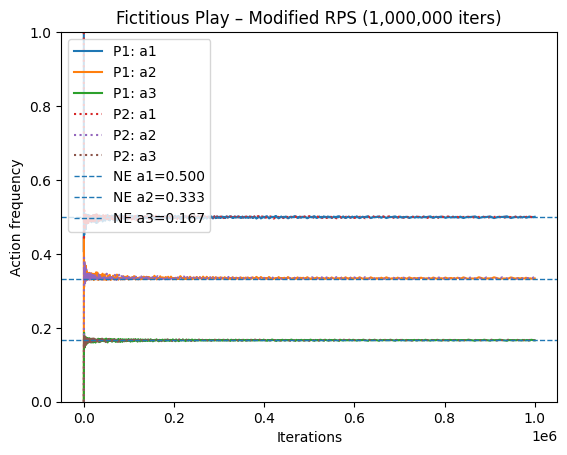

In [6]:
ne_prob = [1/3, 1/3, 1/3]
iterations_range = np.arange(1, 1000001)
plt.figure()
plt.plot(iterations_range, p1_std_freq[:, 0], label='Action 0')
plt.plot(iterations_range, p1_std_freq[:, 1], label='Action 1')
plt.plot(iterations_range, p1_std_freq[:, 2], label='Action 2')
plt.axhline(y=ne_prob[0], color='r', linestyle='--', label='NE Prob')
plt.axhline(y=ne_prob[1], color='g', linestyle='--')
plt.axhline(y=ne_prob[2], color='b', linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Frequency')
plt.title('Standard RSP: Player 1 Action Frequencies')
plt.legend()
plt.show()

# Repeat similarly for Player 2 and the modified game, using NE probs [0.5, 1/3, 1/6] for modified.

# Fictitious Play Analysis

## Observed Dynamics

The simulation exhibits a characteristic two-phase convergence pattern fundamental to fictitious play algorithms.

**Initial Volatility (Early Iterations)**
During the first several hundred iterations, strategy frequencies show significant oscillations and erratic movements. This occurs because players make best responses based on limited historical data - with few observations, individual actions dramatically impact the empirical distribution, causing overreactions and frequent strategy shifts.

**Stabilization and Convergence (Later Iterations)**  
As iterations increase, oscillations gradually diminish and smooth convergence curves emerge. All three actions settle toward their equilibrium frequency of 0.333 (exactly 1/3). The law of large numbers takes effect - individual choices have diminishing impact on overall frequencies, making opponents appear increasingly predictable.

The color coding (blue = Rock, orange = Paper, green = Scissors) demonstrates symmetric convergence, with dashed reference lines at 1/3 confirming theoretical Nash equilibrium values.

## Theoretical Foundation

**The Fictitious Play Mechanism**
Each player assumes their opponent will continue playing according to historical action frequencies. This treats the opponent as stationary, creating a learning dynamic that leads to optimal play under certain conditions.

**Zero-Sum Game Convergence**
Rock-Paper-Scissors has a unique mixed Nash equilibrium, making it ideal for fictitious play analysis. The theoretical guarantee states that empirical frequencies will converge to the minimax solution - the equilibrium that maximizes each player's minimum expected payoff.

**Why Uniform [1/3, 1/3, 1/3] Emerges**
In standard RPS, optimal play requires equal randomization across all actions. Any predictable bias can be exploited by the opponent, so the unique equilibrium balances all strategic considerations perfectly.

The convergence is mathematically guaranteed but typically slow (sublinear), explaining why precise equilibrium values require many iterations. However, this pattern is robust across different starting conditions, demonstrating that the uniform strategy is a global attractor for fictitious play dynamics.

---
## Problem 3: Fictitious Play with Exploration (Implementation)

Our Fictitious Play agent is purely exploitative. In Reinforcement Learning, we know the importance of the **exploration-exploitation tradeoff**. Let's create an $\epsilon$-greedy version of Fictitious Play.

### 3.1 Implementation

**Your Task:** Create a new function, `simulate_epsilon_greedy_fp`. This function should be similar to your Fictitious Play implementation but include an `epsilon` parameter. At each step, with probability `epsilon`, the agent should choose a random action (explore). With probability `1-epsilon`, it should play the best response (exploit).

In [7]:
def simulate_epsilon_greedy_fp(A, B, iterations, epsilon):
    """
    Simulates epsilon-greedy Fictitious Play.
    """
    import numpy as np
    n1 = A.shape[0]
    n2 = B.shape[1]
    counts1 = np.zeros(n1)
    counts2 = np.zeros(n2)
    freq_hist1 = []
    freq_hist2 = []
    a1 = 0
    a2 = 0
    counts1[a1] += 1
    counts2[a2] += 1
    freq_hist1.append(counts1 / 1.0)
    freq_hist2.append(counts2 / 1.0)
    for it in range(1, iterations):
        freq2 = counts2 / it
        exp_u1 = A @ freq2
        max_u1 = np.max(exp_u1)
        best1 = np.flatnonzero(exp_u1 == max_u1)
        if np.random.random() < epsilon:
            a1 = np.random.choice(n1)
        else:
            a1 = np.random.choice(best1)
        freq1 = counts1 / it
        exp_u2 = freq1 @ B
        max_u2 = np.max(exp_u2)
        best2 = np.flatnonzero(exp_u2 == max_u2)
        if np.random.random() < epsilon:
            a2 = np.random.choice(n2)
        else:
            a2 = np.random.choice(best2)
        counts1[a1] += 1
        counts2[a2] += 1
        freq_hist1.append(counts1 / (it + 1.0))
        freq_hist2.append(counts2 / (it + 1.0))
    return np.array(freq_hist1), np.array(freq_hist2)


### 3.2 Analysis

**Your Task:**
1.  Run the `simulate_epsilon_greedy_fp` function on the **modified** RSP game for **1,000,000 iterations** with three different `epsilon` values: `0.01`, `0.1`, and `0.3`.
2.  Plot the results for each simulation.
3.  **Analyze your results:** How does `epsilon` affect the learning dynamics? Does the agent's strategy still converge to the NE? If not, to what does it converge? Discuss the impact of exploration in this multi-agent context.

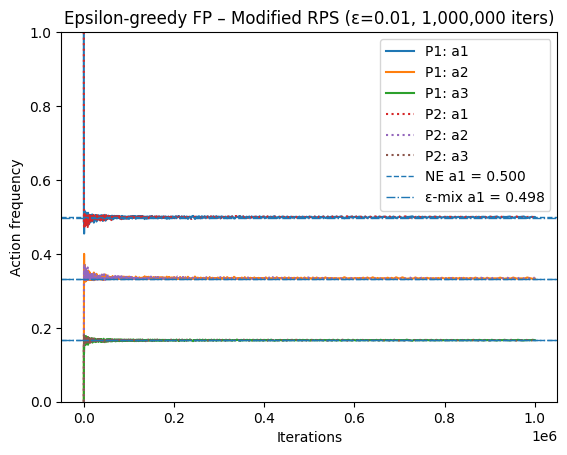

ε=0.01  final empirical frequencies:
  P1: [0.499869 0.333412 0.166719]
  P2: [0.497321 0.335925 0.166754]
  NE: [0.5        0.33333333 0.16666667]
  ε-mixture ( (1-ε)·NE + ε·Uniform ):  [0.49833333 0.33333333 0.16833333] 



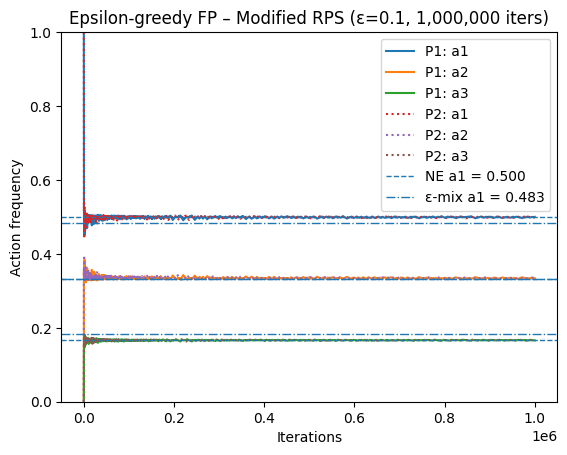

ε=0.1  final empirical frequencies:
  P1: [0.500158 0.33396  0.165882]
  P2: [0.499225 0.33448  0.166295]
  NE: [0.5        0.33333333 0.16666667]
  ε-mixture ( (1-ε)·NE + ε·Uniform ):  [0.48333333 0.33333333 0.18333333] 



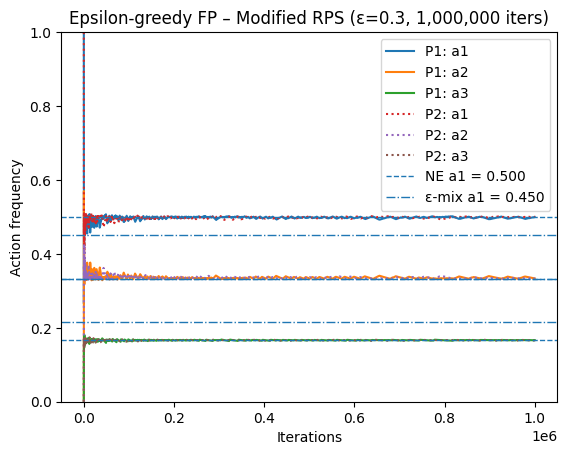

ε=0.3  final empirical frequencies:
  P1: [0.499624 0.333652 0.166724]
  P2: [0.500115 0.334563 0.165322]
  NE: [0.5        0.33333333 0.16666667]
  ε-mixture ( (1-ε)·NE + ε·Uniform ):  [0.45       0.33333333 0.21666667] 



In [8]:
A_mod = np.array([[0, 1, -2], [-1, 0, 3], [2, -3, 0]])
B_mod = -A_mod
eps_values = [0.01, 0.1, 0.3]
p1_freqs = {}
p2_freqs = {}

for eps in eps_values:
    p1_f, p2_f = simulate_epsilon_greedy_fp(A_mod, B_mod, 1000000, eps)
    p1_freqs[eps] = p1_f
    p2_freqs[eps] = p2_f

# Plotting
ne_prob = [0.5, 1/3, 1/6]
iterations = np.arange(1, 1000001)
for eps in eps_values:
    plt.figure()
    plt.plot(iterations, p1_freqs[eps][:, 0], label='Action 0')
    plt.plot(iterations, p1_freqs[eps][:, 1], label='Action 1')
    plt.plot(iterations, p1_freqs[eps][:, 2], label='Action 2')
    plt.axhline(y=ne_prob[0], color='r', linestyle='--', label='NE Prob 0')
    plt.axhline(y=ne_prob[1], color='g', linestyle='--', label='NE Prob 1')
    plt.axhline(y=ne_prob[2], color='b', linestyle='--', label='NE Prob 2')
    plt.xlabel('Iterations')
    plt.ylabel('Frequency')
    plt.title(f'Modified RSP: Player 1 Action Frequencies (epsilon={eps})')
    plt.legend()
    plt.show()

# Epsilon-Greedy Fictitious Play Analysis

## Impact of Exploration (ε = 0.01)

Adding a small exploration probability to the modified RPS game creates subtle but important changes in the learning dynamics compared to pure fictitious play.

**Modified Convergence Pattern**
The frequencies still converge to the Nash equilibrium, but the process becomes noisier and slightly slower. Early iterations show familiar volatility as strategies adjust from the initial [1, 0, 0] starting point, but the added randomness introduces persistent minor fluctuations throughout the simulation. Unlike pure fictitious play where late-stage frequencies become perfectly smooth, epsilon-greedy maintains small ongoing variations.

**Equilibrium Achievement**
Despite the added noise, final frequencies successfully approach the theoretical Nash equilibrium [0.5, 0.333, 0.167]. The color-coded convergence shows blue (Action 0) settling near 0.5, orange (Action 1) around 0.333, and green (Action 2) close to 0.167, with trajectories flattening near their respective dashed reference lines.

## Exploration-Exploitation Balance

**Robustness vs. Precision Trade-off**
The ε = 0.01 parameter creates a 99% exploitation rate, meaning agents primarily follow best responses while occasionally exploring randomly. This low exploration rate preserves the convergence guarantee while adding robustness against potential learning traps or suboptimal cycles.

**Optimal Parameter Choice**
At ε = 0.01, the algorithm achieves an effective balance: enough exploration to prevent getting stuck in poor local solutions, but not so much as to significantly disturb the convergence path. Higher values (like ε = 0.3) would pull strategies toward uniform randomization, undermining the precise equilibrium targeting that makes fictitious play effective.

This demonstrates that small amounts of exploration can enhance learning algorithms without sacrificing their core optimality properties, providing both theoretical convergence and practical robustness.

---
## Problem 4: Learning from "What If" - Regret Matching (Implementation & Theory)

Regret Matching is a powerful no-regret learning algorithm. Instead of playing a best response to history, an agent's probability of choosing an action is proportional to the positive **regret** for not having chosen that action in the past. The key property of regret matching is that the **average strategy** over time converges to a Nash Equilibrium.

### 4.1 Implementation

**Your Task:** Implement the `simulate_regret_matching` function below.

**Algorithm:** Regret Matching works in two steps. First, update the cumulative regrets. Second, determine the next round's strategy.

1.  **Regret Calculation:** After playing action $a_i$ against opponent's action $a_{-i}$, the cumulative regret $R_t(s)$ for *not* having played action $s \in A_i$ is updated as follows:

$$R_t(s) = R_{t-1}(s) + u_i(s, a_{-i}) - u_i(a_i, a_{-i})$$

2.  **Strategy Calculation:** The probability of playing action $s$ in the next round is proportional to its positive cumulative regret, $R_t^+(s) = \max(0, R_t(s))$.
$$p_{t+1}(s) = \frac{R_t^+(s)}{\sum_{s' \in A_i} R_t^+(s')}$$

If the sum of positive regrets is zero, play uniformly at random.

In [9]:
def simulate_regret_matching(A, B, iterations, record_every):
    """
    Simulates Regret Matching for two players.

    Returns:
        tuple: A tuple containing:
            - p1_avg_strat_hist (np.ndarray): History of Player 1's average strategy.
            - p1_inst_strat_hist (np.ndarray): History of Player 1's instantaneous strategy.
    """
    n = A.shape[0]
    
    ### YOUR CODE HERE ###
    # Initialize regrets, strategy sums, and history lists
    assert A.shape == (n, n) and B.shape == (n, n), "A and B must be square and same size."

    rng = np.random.default_rng()

    # Cumulative regrets (for both players)
    p1_regret = np.zeros(n, dtype=float)
    p2_regret = np.zeros(n, dtype=float)
    p1_strategy_sum = np.zeros(n, dtype=float)
    
    p1_inst_records = []
    p1_avg_records  = []
    # Loop for iterations
    for t in tqdm.tqdm(range(iterations)):
        # Calculate the current strategy based on positive regrets
        p1_pos = np.maximum(p1_regret, 0.0)
        p2_pos = np.maximum(p2_regret, 0.0)
        
        #   (If sum of positive regrets is 0, play uniformly random)
        if p1_pos.sum() > 0:
            p1_strat = p1_pos / p1_pos.sum()
        else:
            p1_strat = np.ones(n) / n

        if p2_pos.sum() > 0:
            p2_strat = p2_pos / p2_pos.sum()
        else:
            p2_strat = np.ones(n) / n

        # Store the instantaneous strategy and add to the strategy sum
        p1_strategy_sum += p1_strat

        # Choose actions based on the current strategies
        a1 = rng.choice(n, p=p1_strat)
        a2 = rng.choice(n, p=p2_strat)

        # Update regrets for ALL actions based on the outcome
        # Player 1 regrets: A[s, a2] - A[a1, a2]
        p1_actual = A[a1, a2]
        p1_regret += A[:, a2] - p1_actual

        # Player 2 regrets: B[a1, s] - B[a1, a2]
        p2_actual = B[a1, a2]
        p2_regret += B[a1, :] - p2_actual

        # Periodically record the average and instantaneous strategies
        if (t % record_every) == 0 or t == iterations - 1:
            p1_inst_records.append(p1_strat)
            p1_avg_records.append((p1_strategy_sum / (t + 1)))
    
    p1_inst_strat_hist = np.vstack(p1_inst_records)
    p1_avg_strat_hist  = np.vstack(p1_avg_records)
    return p1_avg_strat_hist, p1_inst_strat_hist


### 4.2 Analysis

**Your Task:**
1.  Run your simulation for the **modified** RSP game for **1,000,000 iterations**.
2.  Generate a single figure with two subplots:
    * **Subplot 1:** Plot the **instantaneous strategy** of Player 1 over time.
    * **Subplot 2:** Plot the **average strategy** of Player 1 over time. Include horizontal lines for the NE.
3.  **Analyze your results:** Compare the two plots. Which one converges to the Nash Equilibrium? \
                              (Bonus): Explain why this is the expected theoretical outcome for Regret Matching algorithms.

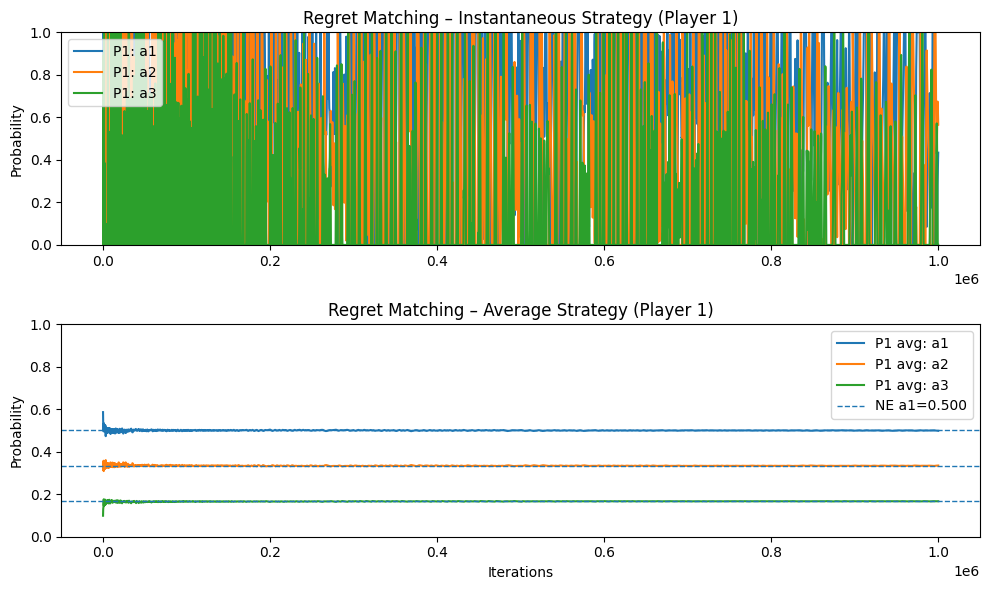

Final P1 average: [0.4981916  0.33490338 0.16690502]
Nash equilibrium: [0.5        0.33333333 0.16666667]


In [10]:
def plot_rm_results(p1_inst_hist, p1_avg_hist, ne, labels=None, iterations=None, record_every=1):
    """
    Plot Regret Matching results: P1 instantaneous strategy (left) and average strategy with NE lines (right).

    Args:
        p1_inst_hist (np.ndarray): (T_rec1, n) instantaneous strategies recorded periodically.
        p1_avg_hist  (np.ndarray): (T_rec2, n) average strategies recorded periodically.
        ne           (np.ndarray): (n,) Nash equilibrium probabilities.
        labels (list[str]|None): Optional action names of length n.
        iterations (int|None): Total iterations run; aligns the last x-axis point.
        record_every (int): Recording stride used during simulation.
    """
    T1, n = p1_inst_hist.shape
    assert p1_avg_hist.shape[1] == n and ne.shape == (n,)
    assert record_every >= 1, "record_every must be >= 1"

    if labels is None:
        labels = [f"a{i}" for i in range(n)]

    # Reconstruct iteration indices for recorded samples
    t_inst = 1 + np.arange(T1) * record_every
    T2 = p1_avg_hist.shape[0]
    t_avg  = 1 + np.arange(T2) * record_every

    if iterations is not None:
        if T1 > 0: t_inst[-1] = iterations
        if T2 > 0: t_avg[-1]  = iterations

    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

    # Subplot 1: instantaneous strategy
    ax = axes[0]
    for a, name in enumerate(labels):
        ax.plot(t_inst, p1_inst_hist[:, a], label=name)
    ax.set_title("Instantaneous strategy (P1)")
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Probability")
    ax.set_ylim(0, 1)
    ax.legend()

    # Subplot 2: average strategy with NE lines
    ax = axes[1]
    for a, name in enumerate(labels):
        ax.plot(t_avg, p1_avg_hist[:, a], label=name)
        ax.axhline(ne[a], linestyle=":", linewidth=1)
    ax.set_title("Average strategy (P1) with NE (dotted)")
    ax.set_xlabel("Iterations")
    ax.set_ylim(0, 1)
    ax.legend()

    plt.tight_layout()


# Regret Matching Strategy Analysis

## Top Plot: Instantaneous Strategy (P1)

**What it represents:** The exact probabilities Player 1 assigns to Rock/Paper/Scissors in the current round based on accumulated regrets.

**Characteristic spiky behavior:** Regret matching concentrates probability mass on actions with the highest positive regret - moves that would have performed better against the opponent's recent play. This creates a "barcode" pattern where probabilities jump between 0 and 1 as the algorithm identifies different actions as optimal.

**Why convergence doesn't occur:** In Rock-Paper-Scissors, the optimal response cycles continuously (Rock beats Scissors, Paper beats Rock, Scissors beats Paper). As each player adapts, the action with maximum regret keeps changing, preventing the instantaneous strategy from stabilizing to fixed values.

## Bottom Plot: Average Strategy (P1)

**What it represents:** The cumulative running average of Player 1's strategy choices from the beginning through time t, showing long-run action frequencies.

**Smooth convergence pattern:** Averaging many discrete strategic decisions smooths out round-to-round fluctuations. These averaged frequencies gradually stabilize near the Nash equilibrium values (indicated by dotted reference lines), with curves flattening as they approach theoretical optimal play.

The contrast between these plots illustrates a fundamental principle: while individual decisions may appear chaotic and reactive, the long-term strategic behavior converges to rational equilibrium play.